1. Відкрити та зчитати наданий файл з даними.

In [ ]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("clustering_input_data.csv", sep=';')

2. Визначити та вивести кількість записів.

In [13]:
df.shape

(1599, 12)

3. Вивести атрибути набору даних.

In [14]:
list(df)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

4. Отримати  десять  варіантів  перемішування  набору  даних  та  розділення його  на  навчальну  (тренувальну)  та  тестову  вибірки,  використовуючи функцію ShuffleSplit. Сформувати начальну та тестові вибірки на основі восьмого варіанту. З’ясувати збалансованість набору даних.


In [15]:
split = list(ShuffleSplit(n_splits=10, test_size=1/3, random_state=42).split(df))[7]
train_df = df.iloc[split[0]]
test_df = df.iloc[split[1]]

print(train_df.shape)
print(test_df.shape)

(1066, 12)
(533, 12)


5. Використовуючи  функцію  KNeighborsClassifier  бібліотеки  scikit-learn,
збудувати класифікаційну модель на основі методу k найближчих
сусідів ( значення всіх параметрів залишити за замовчуванням) та
навчити її на тренувальній вибірці, вважаючи, що цільова
характеристика визначається стовпчиком quality, а всі інші виступають
в ролі вихідних аргументів.


In [16]:
X_train = train_df.drop(columns=['quality'])
y_train = train_df['quality']
X_test = test_df.drop(columns=['quality'])
y_test = test_df['quality']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

6. Обчислити класифікаційні метрики збудованої моделі для тренувальної
та тестової вибірки. Представити результати роботи моделі на тестовій
вибірці графічно.

Метрики для тестової вибірки:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.40      0.10      0.15        21
           5       0.54      0.69      0.61       205
           6       0.52      0.56      0.54       217
           7       0.58      0.27      0.37        79
           8       0.00      0.00      0.00         7

    accuracy                           0.53       533
   macro avg       0.34      0.27      0.28       533
weighted avg       0.52      0.53      0.51       533

Метрики для тренувальної вибірки:
              precision    recall  f1-score   support

           3       0.67      0.33      0.44         6
           4       0.14      0.03      0.05        32
           5       0.74      0.84      0.79       476
           6       0.70      0.73      0.72       421
           7       0.69      0.44      0.54       120
           8       0.00      0.00      0.00        11

    accuracy 

c:\ada\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ada\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ada\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ada\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Prec

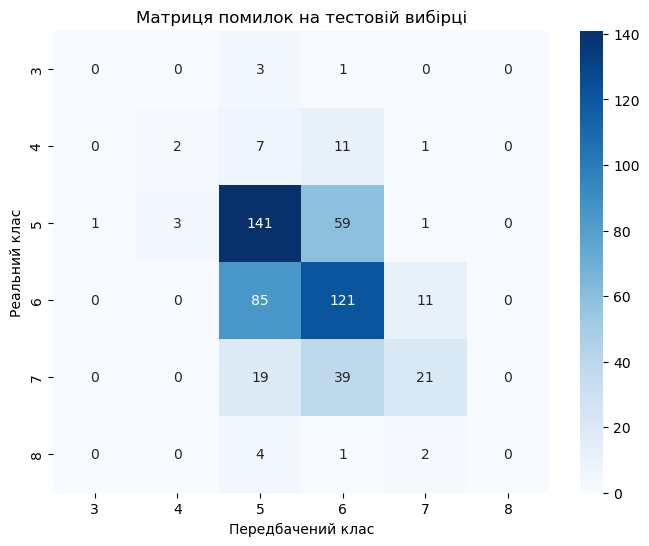

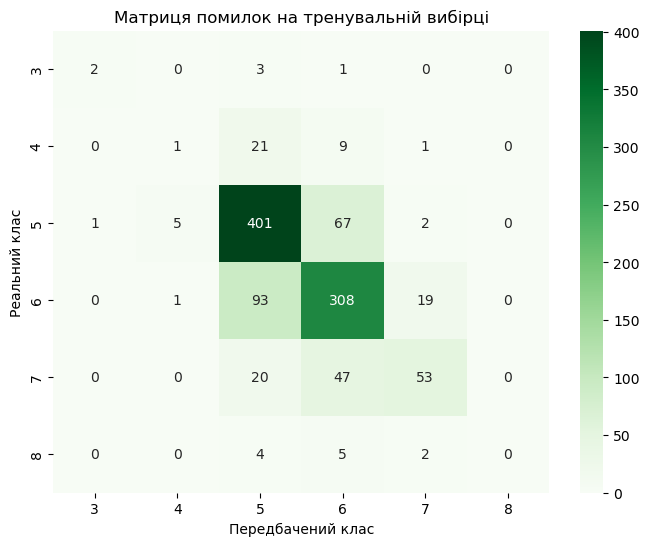

In [17]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print("Метрики для тестової вибірки:")
print(classification_report(y_test, y_pred_test))

print("Метрики для тренувальної вибірки:")
print(classification_report(y_train, y_pred_train))

labels = sorted(y_test.unique())

cm_test = confusion_matrix(y_test, y_pred_test, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Матриця помилок на тестовій вибірці")
plt.xlabel("Передбачений клас")
plt.ylabel("Реальний клас")
plt.show()

labels_train = sorted(y_train.unique())
cm_train = confusion_matrix(y_train, y_pred_train, labels=labels_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens',xticklabels=labels_train, yticklabels=labels_train)
plt.title("Матриця помилок на тренувальній вибірці")
plt.xlabel("Передбачений клас")
plt.ylabel("Реальний клас")
plt.show()

7. З’ясувати вплив кількості сусідів ( від 1 до 20) на результати
класифікації. Результати представити графічно.

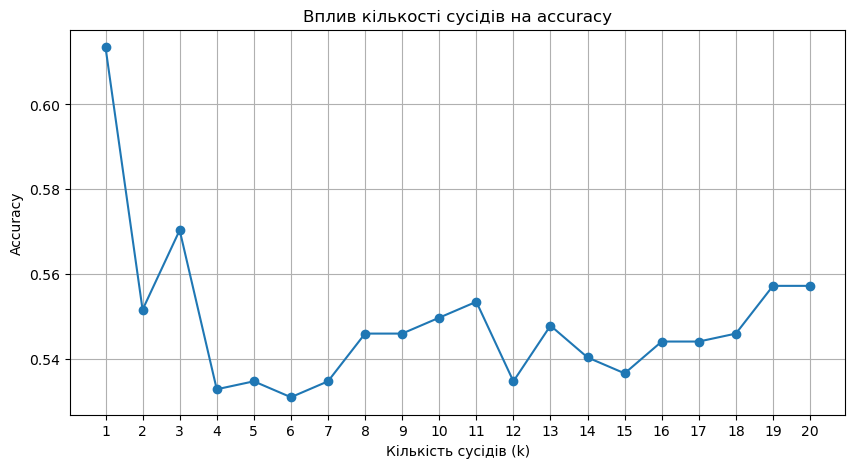

In [9]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = range(1, 21)
accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    acc = model.score(X_test_scaled, y_test)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("Вплив кількості сусідів на accuracy")
plt.xlabel("Кількість сусідів (k)")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()